
## Homework 6 - LearNNing Deeply
### Your Name: Alyssa Kern

**COLLABORATED WITH:_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _**

***
***
***

**Submit a PDF export of your notebook (100% PENALTY IF NO PDF IS SUBMITTED)** 

* File > Export Notebook to HTML (you cannot upload .html to Compass), open .html in browser, print to PDF
    - **_Ensure your code is not cut off_**

***
***
***

#### Table of Contents

- [Theory](#Theory)
    - [[9 Points] Gradient Descent](#[9-Points]-Gradient-Descent)
    - [Acitvation Functions](#Acitvation-Functions)
        - [[5 Points] Part 1](#[5-Points]-Part-1)
        - [[3 Points] Part 2](#[3-Points]-Part-2)
        - [[3 Points] Part 3](#[3-Points]-Part-3)
- [Neural Network Anatomy](#Neural-Network-Anatomy)
    - [[2 Points] Create ReLU](#[2-Points]-Create-ReLU)
    - [[8 Points] Create Base Objects](#[8-Points]-Create-Base-Objects)
    - [[6 Points] Evaluate Hidden Layer $z$s](#[6-Points]-Evaluate-Hidden-Layer-$z$s)
    - [[4 Points] Evaluate Output Layer $z$s](#[4-Points]-Evaluate-Output-Layer-$z$s)
    - [[4 Points] Print $\hat{y}_1$](#[4-Points]-Print-$\hat{y}_1$)
    - [[4 Points] Print $\frac{\partial C_1}{\partial w_{1,3}^2}$](#[4-Points]-Print-$\frac{\partial-C_1}{\partial-w_{1,3}^2}$)
    - [[4 Points] Print $\frac{\partial C_1}{\partial b_2^1}$](#[4-Points]-Print-$\frac{\partial-C_1}{\partial-b_2^1}$)
    - [[8 Points] The First Batch](#[8-Points]-The-First-Batch)
- [Application](#Application)
    - [Model 1](#Model-1)
        - [[6 Points] Initialization](#[6-Points]-Initialization)
        - [[3 Points] Compilation](#[3-Points]-Compilation)
        - [[9 Points] Fitting](#[9-Points]-Fitting)
        - [[2 Points] Evaluation](#[2-Points]-Evaluation)
    - [Model 2](#Model-2)
        - [[6 Points] Initialization](#[6-Points]-Initialization)
        - [[3 Points] Compilation](#[3-Points]-Compilation)
        - [[9 Points] Fitting](#[9-Points]-Fitting)
        - [[2 Points] Evaluation](#[2-Points]-Evaluation)

In [1]:
a = 9 + 5 + 3 + 3
b = 2+8+6+4+4+4+4+8
c = 6+3+9+2
d = c
a, b, c, d

(20, 40, 20, 20)

*********

# Theory
[TOP](#Homework-6---LearNNing-Deeply)

## [9 Points] Gradient Descent 
[TOP](#Homework-6---LearNNing-Deeply)

Compare and contrast the three different gradient descent algorithms we have covered with respect to:

1. Whether or not they converge
2. Their relative speed
3. Whether they can escape non-global minima

**Points**: 3 algorithms × 3 characteristics = 9 points.

************
## Acitvation Functions
[TOP](#Homework-6---LearNNing-Deeply)

*************
### [5 Points] Part 1

What is the relationship between the output layer activation function and $\hat{y}$?

**Answer:**

**The parameters in a neural network are essentially input weights/biases that are fed through a series of activation functions. They first go through hidden layers until they finally go through the output layer, which will give us the value of $\hat{y}$.**

***********
### [3 Points] Part 2

Which activation function discussed in lecture can lead to dead neurons?

**Answer:**

**The ReLU activation function can lead to dead neurons. This happens when the derivative is zero for all negative numbers.**


*************
### [3 Points] Part 3

Name an activation function based off of your answer above that was discussed in class that solves the dead neuron problem.

**Answer:**

**An activation function that can solve the dead neuron problem is 'leaky ReLU'. The leaky ReLU modifies the function so that small negative values are allowed when the input is less than zero.**

*************
# Neural Network Anatomy
[TOP](#Homework-6---LearNNing-Deeply)


**Directions:** The output should be from code chunks.
You will likely find it helpful to first solve by hand before coding the solutions. 
*I genuinely always do this for more involved coding problems*.

We are going to work with this neural network:

![](hw_nn.png)

Here is our made-up data:


| Profit   | Step 1: Collect Pants | Step 2: ? |
|----------|-----------|----------------|
| -10      | 20        | -40            |
| 1        | 5         | 42             |
| $y_3$    | $x_{1,3}$ | $x_{2,3}$      |
| $\vdots$ | $\vdots$  | $\vdots$       |


Here are some weights:

| Layer  | Neuron | Input 1 Weight    | Input 2 Weight    | Input 3 Weight    | Bias        |
|--------|--------|-------------------|-------------------|-------------------|-------------|
| Hidden | Top    | $w^1_{1,1} = 0.3$ | $w^1_{1,2} = 0.4$ | *NA*              | $b^1_1 = 1$ |
| Hidden | Middle | $w^1_{2,1} = 0.1$ | $w^1_{2,2} = 0.6$ | *NA*              | $b^1_2 = 1$ |
| Hidden | Bottom | $w^1_{3,1} = 0.7$ | $w^1_{3,2} = 0.1$ | *NA*              | $b^1_3 = 1$ |
| Output | Yup.   | $w^2_{1,1} = 0.9$ | $w^2_{1,2} = 0.7$ | $w^2_{1,3} = 0.5$ | $b^2_1 = 1$ |


To make things a bit easier for you, use ReLU for the **hidden layer** activation function:

$$\text{ReLU}(z) = \begin{cases}
0 & \text{if } z \leq 0\\
z & \text{if } z > 0
\end{cases}$$


Use the swanky `None` function for the **output layer** activation function:

$$\text{none}(z) = z$$


Use the MSE for the cost function:

$$ C_k = (\hat{y}_k - y_k)^2$$

And let

$$\eta = 0.05$$

***********************

**OBJECTIVE:** Determine how much we will adjust $w^2_{1,3}$ and $b^1_2$ using a batch of two observations.
You will need to calculate the first iteration's $\frac{\partial C_1}{\partial w^2_{1,3}}$ and $\frac{\partial C_1}{\partial b^1_2}$.
I will give you the second iteration's $\frac{\partial C_2}{\partial w^2_{1,3}}$ and $\frac{\partial C_2}{\partial b^1_2}$.

***********

## [2 Points] Create ReLU
[TOP](#Homework-6---LearNNing-Deeply)

Create a function `r()` for ReLU and `r_prime` for its derivative.

*Note: you do not need any packages to do this sections.*

In [2]:
#def r(z):
 #   if z <= 0:
  #      return(0)
   # if z > 0:
    #    return(z)
#def r_prime(z):
 #   if z <= 0:
  #      return(0)
   # if z > 0:
    #    return(0)

This was a simple mistake on my part for not being careful with the definition and interpretation of the relu function. I misinterpreted the task and assumed that if z was greater than 0 and was a constant, that the derivative would be 0. However, the relu function is a piecewise linear function. The derivative of relu is simply the slope where the input is positive. Since relu is linear, the slope is constant and equal to 1. This is why for r_prime(z) should return 1 instead of 0 if z is greater than 0.

In [3]:
def r(z):
    if z <= 0:
        return(0)
    if z > 0:
        return(z)
def r_prime(z):
    if z <= 0:
        return(0)
    if z > 0:
        return(1)

*************
## [8 Points] Create Base Objects
[TOP](#Homework-6---LearNNing-Deeply)


Create unique objects in `python` for the $y_1$, $x_{1,1}$, $x_2,1$, the respective weights and biases, and $\eta$.

In [4]:
y1 = -10
x111 = 20
x112 = -40
w111 = 0.3
w112 = 0.4
w121 = 0.1
w122 = 0.6
w131 = 0.7
w132 = 0.1
w211 = 0.9
w212 = 0.7
w213 = 0.5
bias = 1
learn_rate = 0.05

******
## [6 Points] Evaluate Hidden Layer $z$s
[TOP](#Homework-6---LearNNing-Deeply)

Create unique objects for the hidden layer's $z$ values.

In [5]:
z11 = w111 * x111 + w112 * x112 + bias
z12 = w121 * x111 + w122 * x112 + bias
z13 = w131 * x111 + w132 * x112 + bias

*********
## [4 Points] Evaluate Output Layer $z$s
[TOP](#Homework-6---LearNNing-Deeply)

Using the defined values of $z$ above, calculate $z_1^2$ using your definied function(s).

In [6]:
#z21 = w211 * r(z11) + w212 * r(z12) + bias

I simply forgot to add the third component of the ouput layer, 'w213 * r(z13)'. The output layer's inputs are made up from the layers before it, as shown in the hidden layer z's section above. 

In [7]:
z21 = w211 * r(z11) + w212 * r(z12) + w213 * r(z13) + bias

************
## [4 Points] Print $\hat{y}_1$
[TOP](#Homework-6---LearNNing-Deeply)


Calculate and print $\hat{y}_1$.

In [8]:
y1hat = r(z21)
print(y1hat)

6.5


***********
## [4 Points] Print $\frac{\partial C_1}{\partial w_{1,3}^2}$
[TOP](#Homework-6---LearNNing-Deeply)


Using the chain rule, evaluate and print $\frac{\partial C_1}{\partial w_{1,3}^2}$

**2 POINTS EXTRA CREDIT** 

- Line 1 -  Use LaTeX to write out the chain rule as we did in class (the partial derivatives).
- Line 2 - Plug in the to the derivatives the gerenerlized evaluation (no values, i.e. use $w^2_{1,3}$) of those partial derivatives.

In [9]:
#dc_dw = 2 * (r(z21) - y1) * r(z21) * (1 - r(z21))
#print(dc_dw)

The equation for Ck was given to us previously in the homework and C1 is equal to (y1hat - y1) ^ 2. Using the chain rule, we bring down the 2 and multiply it by (y1hat - y1) ^ 1. Then we must multiply that by the derivative of (y1hat - y1), which is 1 * r(z13). I mistakenly used r(z21) instead of y1hat and used r(z21) instead of r(z13). 

In [10]:
dc_dw = ( 2 * (y1hat - y1)) * 1 * r(z13)
dc_dw

363.0

In [11]:
# EXTRA CREDIT

$$ \frac{\partial C_1}{\partial w_{1,3}^2} $$
$$ = \frac{\partial C_1}{\partial X} * \frac{\partial z_{1}^2}{\partial z_{1}^2}*\frac{\partial z_{1}^2(w_{1,3}^2)}{\partial w_{1,3}^2} $$
$$  = [2(\hat{y}_1-y_1)] * 1 * ReLU(z_{3}^1) $$

*********
##  [4 Points] Print $\frac{\partial C_1}{\partial b_2^1}$
[TOP](#Homework-6---LearNNing-Deeply)


Using the chain rule, evaluate and print $\frac{\partial C_1}{\partial b_2^1}$.

**2 POINTS EXTRA CREDIT** 

- Line 1 -  Use LaTeX to write out the chain rule as we did in class (the partial derivatives).
- Line 2 - Plug in the to the derivatives the gerenerlized evaluation (no values, i.e. use $w^2_{1,3}$) of those partial derivatives.

In [12]:
#dc_db = 2 * (r(z21) - y1) * r(z21) * (1 - r(z21)) * w212 * r(z12) * (1 - r(z12))
#print(dc_db)

Again, following the chain rule we bring down the 2 and multiply that by (y1hat - y1) ^ 1. Then we multiply that by the derivative of the inside which is 1 * w212 * r_prime(z12) , not r(z21) * (1 - r(z21)) * w212 * r(z12) * (1 - r(z12)) like I put. I also made the same mistake of using r(z21) as y1hat again in this problem.

In [13]:
dc_db = ( 2 *(y1hat - y1)) * 1 * w212 * r_prime(z12)

In [14]:
# EXTRA CREDIT

$$ \frac{\partial C_1}{\partial b_{2}^1} $$
$$ = \frac{\partial C_1}{\partial none} * \frac{\partial none(z_{1}^2)}{\partial z_{1}^2} * \frac{\partial z_{1}^2(ReLU_{2}^1)}{\partial ReLU_{2}^1} * \frac{\partial ReLU_{2}^1}{\partial z_{2}^1} *
\frac{\partial z_{2}^1}{\partial b_{2}^1} $$
$$ = [2(\hat{y}_1-y_1)] * 1 * w_{1,2}^2 * ReLU_{2}^1\prime{z_{2}^1)} * 1 $$

***********
## [8 Points] The First Batch
[TOP](#Homework-6---LearNNing-Deeply)


If your code is correct, you can verify $\frac{\partial C_2}{\partial w^2_{1,3}} = 703.134$ exactly and 
$\frac{\partial C_2}{\partial b^1_2} = 56.574$ exactly.

To wrap up this problem, by how much do we adjust $w^2_{1,3}$ and $b^1_2$ by respectively after our first tiny batch (not their new values)?

In [15]:
# verify !!!

I was initially unsure of how to verify that the derivative of C2 in respect to w213 was equal to 703.134 and the derivative of C2 in respect to b12 was 56.574. To do this, I had to multiply the negative learn rate (-0.05) by the value I got for dc_dw + the given value for it divided by 2. I did the same process again with dc_db. This confirms that our code is correct and verifies these values.

In [16]:
# w^2_{1,3} changes by:
-learn_rate * (dc_dw + 703.134)/2

# b^2_1 changes by:
-learn_rate * (dc_db + 56.574)/2

-1.41435

***************
# Application
[TOP](#Homework-6---LearNNing-Deeply)

**10% EXTRA CREDIT OPPORTUNITY**

In the application section, you will fit two models to predict `l_incwage`:

1. A single layer neural network
2. Any neural network of your choosing using the Keras package

The 10% extra credit on this assignment is awarded to the student with the chosen model that has the lowest testing RMSE.
There is a new folder `AAA HW6 Competition` in the Box folder where you uploaded your final project data, in which you will submit your evaluation RMSE as a box note.
I have provided an example (the RMSE of the first model) in the folder: copy and paste the entire RMSE into the title on the Box note followed by your name.

**CONDITIONS FOR WINNING**

1. The student with the best RMSE must provide a separate Jupyter Notebook to me containing the winning model after the competition closes. This notebook will be shared with the entire class (anonymously, if you prefer). The competition closes immediately after the HW due date.
2. I must be able to `Restart Kernel and Run All Cells...` to produce the winning evaluation RMSE.
3. You must use the setup (`train_test_split()`, etc.) provided to you below.
4. You are limited to using Keras package exclusively for the neural network itself. However, you can use any architecture, number of layers, optimizer, learning rate, loss, etc. in your final model.
5. You need not use all of the features from the HW data, but you may neither add additional features to the data nor transform any of the variables.
6. You may have multiple submissions. If you submit more than one, you must delete your original submission and then add a new one to produce an updated time stamp to your submission.
7. You must submit the RMSE in the created Box folder following the format I have provided.
8. In the extremely unlikely event, I reserve the right to void any submission.

Additional comments:

- If there is a tie, the winner is chosen by the earliest submission. Submissions are time stamped.
- You do not need to compete, however, you still need to fit a second model that does not match the first for this HW.
- If you have any clarifying questions, please email me



****************
You will need our `stdz()` function.

In [17]:
%run metrics.py

Here are the packages we need:

In [31]:
# utilities
import pandas as pd

# processing
from sklearn.model_selection import train_test_split

# algorithms
from tensorflow import keras

# plotting
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LeakyReLU

Setting the seed.

In [19]:
import numpy as np
import os
import random
import tensorflow as tf

np.random.seed(490)
os.environ['PYTHONHASHSEED'] = '0'
random.seed(490)
tf.random.set_seed(490)

Setting up our data

In [20]:
df = pd.read_csv('hw_data.csv')
df.set_index(['county', 'ind1990', 'occ2010'], inplace = True)

# Pandas is doing the weird "I don't want to join() properly"
# so I am going to force it with pd.concat()
df = pd.concat([
    df.drop(columns = 'degree'),
    pd.get_dummies(df['degree'], drop_first = True)
], axis = 1)

y = df['l_incwage']
x = df.drop(columns = 'l_incwage')

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                   train_size = 2/3,
                                                   random_state = 490)

x_train = x_train.apply(stdz, axis = 0)
x_test  = x_test.apply(stdz, axis = 0)

*****************
## Model 1
[TOP](#Homework-6---LearNNing-Deeply)

Remember that this model should only have one hidden layer.

*********
### [6 Points] Initialization
[TOP](#Homework-6---LearNNing-Deeply)


**[4 Points]** Define a 

1. Sequential model
2. with an appropriate input shape
3. with one hidden layer that has a size of 100 and a ReLU activation function
4. with an output layer that has a shape of 1 and a linear activation function

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape = x_train.shape[1]))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'linear' ))

**[2 Points]** Print the model summary

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1500      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


*************
### [3 Points] Compilation
[TOP](#Homework-6---LearNNing-Deeply)

Compile the model with 

1. a loss of `'mean_squared_error'`
2. a metric of `tf.keras.metrics.RootMeanSquaredError()`
3. an `'adam'` optimizer

In [23]:
model.compile(loss = 'mean_squared_error',
             metrics = tf.keras.metrics.RootMeanSquaredError(),
             optimizer = 'adam')

*********
### [9 Points] Fitting
[TOP](#Homework-6---LearNNing-Deeply)

1. Set up early stopping with a patience of 4

In [24]:
es = keras.callbacks.EarlyStopping(patience = 4)

Fit the model with

2. a batch size of 128
3. 20 epochs
4. a validation split of 1/5
5. input the early stopping

In [25]:
history = model.fit(x_train, y_train,
                   batch_size = 128,
                   epochs = 20,
                   validation_split = 1/5,
                   callbacks = [es])

Epoch 1/20
3275/3275 [==============================] - 4s 1ms/step - loss: 13.2143 - root_mean_squared_error: 3.2100 - val_loss: 0.5843 - val_root_mean_squared_error: 0.7644
Epoch 2/20
3275/3275 [==============================] - 3s 921us/step - loss: 0.5690 - root_mean_squared_error: 0.7543 - val_loss: 0.5649 - val_root_mean_squared_error: 0.7516
Epoch 3/20
3275/3275 [==============================] - 3s 883us/step - loss: 0.5552 - root_mean_squared_error: 0.7451 - val_loss: 0.5577 - val_root_mean_squared_error: 0.7468
Epoch 4/20
3275/3275 [==============================] - 3s 906us/step - loss: 0.5493 - root_mean_squared_error: 0.7411 - val_loss: 0.5525 - val_root_mean_squared_error: 0.7433
Epoch 5/20
3275/3275 [==============================] - 3s 891us/step - loss: 0.5510 - root_mean_squared_error: 0.7423 - val_loss: 0.5521 - val_root_mean_squared_error: 0.7430
Epoch 6/20
3275/3275 [==============================] - 3s 866us/step - loss: 0.5462 - root_mean_squared_error: 0.7391 - 

Produce a plot of the history.

6. plot only the training RSMSE 
7. and validation RMSE
8. adjust the ylimits
9. Add a grid

In [26]:
history.history
train_results = pd.DataFrame(history.history)
train_results.head()

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,3.593672,1.895698,0.584270,0.764375
1,0.566362,0.752570,0.564869,0.751578
2,0.555093,0.745046,0.557659,0.746766
3,0.550452,0.741925,0.552526,0.743321
4,0.548124,0.740354,0.552108,0.743040


In [27]:
 #train_results.plot()


#plt.ylim(0, 1)
#plt.grid(True)

#plt.show()

The plot I initially provided did not plot only the training RMSE or validation RMSE. I accidently put the train_results = pd.DataFrame(history.history) portion in the previous section, which was not useful. I also neglected to explicitly state that the train_results plot needed to show the root mean squared error and the val root mean squared error.  

<function matplotlib.pyplot.show(close=None, block=None)>

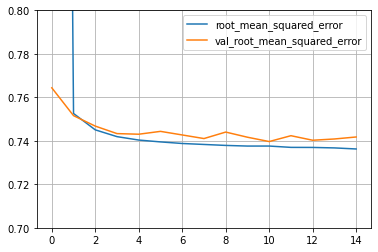

In [28]:
train_results = pd.DataFrame(history.history)

train_results[['root_mean_squared_error',
               'val_root_mean_squared_error']].plot()

plt.ylim(0.7, 0.8)
plt.grid(True)

plt.show

***********
### [2 Points] Evaluation
[TOP](#Homework-6---LearNNing-Deeply)

1. Evaluate the model
2. Only print the RMSE

In [29]:
model_perf = model.evaluate(x_test, y_test)
acc_nn = model_perf[1]
acc_nn

8187/8187 [==============================] - 4s 505us/step - loss: 0.5516 - root_mean_squared_error: 0.7427


0.7427072525024414

******************
## Model 2
[TOP](#Homework-6---LearNNing-Deeply)


Your second chosen model may not match the model above. 
Have fun!

*********
### [6 Points] Initialization
[TOP](#Homework-6---LearNNing-Deeply)

Define your chosen model.

In [33]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Input(shape = x_train.shape[1]))
model2.add(keras.layers.Dense(300, activation = 'relu'))
model2.add(keras.layers.Dense(200, activation = LeakyReLU(alpha = 0.1)))



#model = keras.models.Sequential()
#model.add(keras.layers.Input(shape = x_train.shape[1]))
#model.add(keras.layers.Dense(100, activation = 'relu'))
#model.add(keras.layers.Dense(1, activation = 'linear' ))

*************
### [3 Points] Compilation
[TOP](#Homework-6---LearNNing-Deeply)

Compile your model with your chosen

1. loss
3. optimizer

You must use at least the RMSE metric:

3. a metric of `tf.keras.metrics.RootMeanSquaredError()`

In [34]:
model2.compile(loss = 'mean_absolute_percentage_error',
             metrics = tf.keras.metrics.RootMeanSquaredError(),
             optimizer = 'adam')

*********
### [9 Points] Fitting
[TOP](#Homework-6---LearNNing-Deeply)

- **[5 Points]** Fit your chosen model
- **[4 Points]** Plot the history

In [35]:
#es = keras.callbacks.EarlyStopping(patience = 3)

#history.history
#train_results_2 = pd.DataFrame(history.history)
#train_results_2.head()

I think I made a very silly mistake here by not even fitting my model. The code I originally submitted only printed out the head of the model, but did not fit it. I also failed to include the code that was nnecessary to show the history plot.

In [36]:
es = keras.callbacks.EarlyStopping(patience = 3)
history2 = model2.fit(x_train, y_train,
                     batch_size = 32,
                     epochs = 30,
                     validation_split = 0.2,
                     callbacks = [es])

train_results_2 = pd.DataFrame(history.history)

Epoch 1/30
13098/13098 [==============================] - 18s 1ms/step - loss: 8.8433 - root_mean_squared_error: 1.5247 - val_loss: 5.6305 - val_root_mean_squared_error: 0.7700
Epoch 2/30
13098/13098 [==============================] - 19s 1ms/step - loss: 5.6423 - root_mean_squared_error: 0.7717 - val_loss: 5.5522 - val_root_mean_squared_error: 0.7583
Epoch 3/30
13098/13098 [==============================] - 19s 1ms/step - loss: 5.5173 - root_mean_squared_error: 0.7585 - val_loss: 5.6229 - val_root_mean_squared_error: 0.7641
Epoch 4/30
13098/13098 [==============================] - 19s 1ms/step - loss: 5.4711 - root_mean_squared_error: 0.7533 - val_loss: 5.4855 - val_root_mean_squared_error: 0.7544
Epoch 5/30
13098/13098 [==============================] - 19s 1ms/step - loss: 5.4630 - root_mean_squared_error: 0.7532 - val_loss: 5.4872 - val_root_mean_squared_error: 0.7575: 1s - loss: 5
Epoch 6/30
13098/13098 [==============================] - 19s 1ms/step - loss: 5.4233 - root_mean_squ

***********
### [2 Points] Evaluation
[TOP](#Homework-6---LearNNing-Deeply)


1. Evaluate the model
2. Only print the RMSE

In [37]:
model_perf_2 = model2.evaluate(x_test, y_test)
acc_nn_2 = model_perf_2[1]
acc_nn_2

8187/8187 [==============================] - 6s 776us/step - loss: 5.4249 - root_mean_squared_error: 0.7509 0s - loss: 5.4207 - root_mean_squared_e


0.7508773803710938